# Proof of concept using PyCaret  

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path 
#todo import pycaret

In [ ]:
path = Path('../data')

In [ ]:
df = pd.read_csv(path/'pcs_data.csv')
df = df.sample(frac=1, random_state=38).reset_index(drop=True)
df.shape

(15, 4)

In [ ]:
df.head()

,Concentration(%wt),Flow rate(kg/h),Re,labels
0,14.0,600,7217,tsp
1,4.1,1500,18380,np
2,7.1,700,8531,tsp
3,6.8,400,4878,tsp
4,6.4,330,4027,np


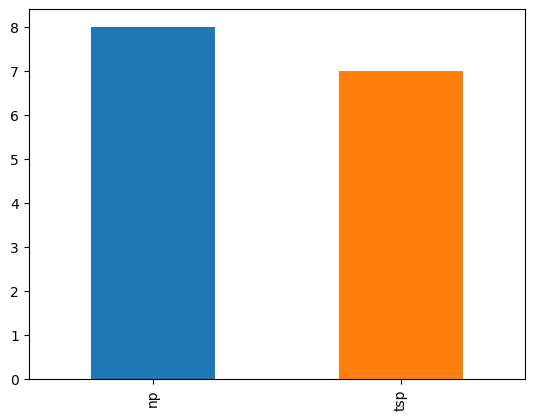

In [ ]:
df["labels"].value_counts().plot.bar(color=['C0', 'C1'])
plt.show()

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data=df, target = 'labels',  session_id=123,
            train_size=0.99,
            normalize = True, 
            fold = 14,
            fold_strategy='kfold',
            numeric_features = ['Concentration(%wt)', 'Flow rate(kg/h)', 'Re'])

,Description,Value
0,session_id,123
1,Target,labels
2,Target Type,Binary
3,Label Encoded,"np: 0, tsp: 1"
4,Original Data,"(15, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top1 = compare_models(n_select = 1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8571,0.0000,0.4286,0.4286,0.4286,nan,0.0000,0.0093
gbc,Gradient Boosting Classifier,0.8571,0.0000,0.3571,0.3571,0.3571,nan,0.0000,0.0064
dt,Decision Tree Classifier,0.7857,0.0000,0.3571,0.3571,0.3571,nan,0.0000,0.0029
nb,Naive Bayes,0.6429,0.0000,0.2143,0.2143,0.2143,nan,0.0000,0.0021
rf,Random Forest Classifier,0.6429,0.0000,0.3571,0.3571,0.3571,nan,0.0000,0.0271
qda,Quadratic Discriminant Analysis,0.6429,0.0000,0.2143,0.2143,0.2143,nan,0.0000,0.0021
et,Extra Trees Classifier,0.5714,0.0000,0.3571,0.3571,0.3571,nan,0.0000,0.0286
knn,K Neighbors Classifier,0.4286,0.0000,0.2143,0.2143,0.2143,nan,0.0000,0.0050
svm,SVM - Linear Kernel,0.4286,0.0000,0.2857,0.2857,0.2857,nan,0.0000,0.0021
lr,Logistic Regression,0.3571,0.0000,0.2143,0.2143,0.2143,nan,0.0000,0.0021


In [ ]:
top1

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

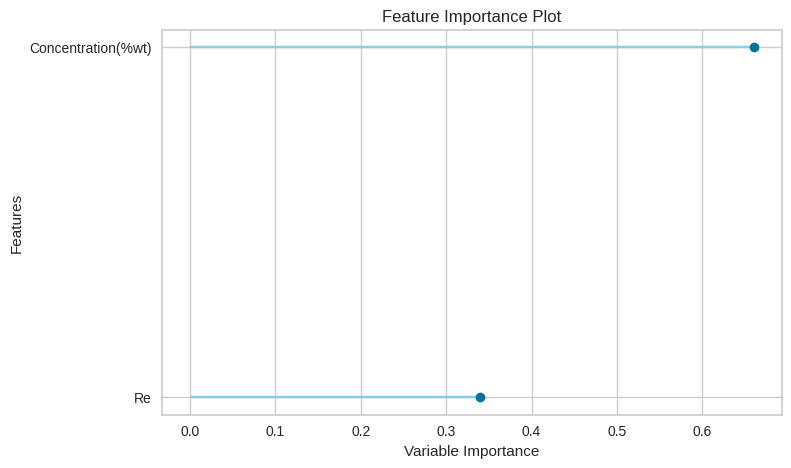

In [ ]:
plot_model(top1, plot='feature')